In [ ]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 

In [84]:
quandl.ApiConfig.api_key= 'B4iLayq6qaeZAJfTW9XW'

df = quandl.get("WIKI/AAPL")
df= df[['Adj. Close']]

df.head()
df

,Adj. Close
Date,
1980-12-12,0.422706
1980-12-15,0.400652
1980-12-16,0.371246
1980-12-17,0.380362
1980-12-18,0.391536
...,...
2018-03-21,171.270000
2018-03-22,168.845000
2018-03-23,164.940000


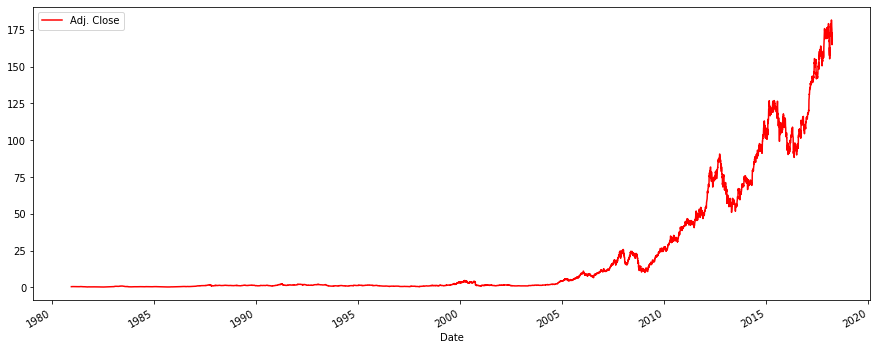

In [85]:
df['Adj. Close'].plot(figsize=(15,6), color='r')
plt.legend (loc='upper left')
plt.show ()

In [59]:
forecast = 30 
df ['Prediction'] = df [['Adj. Close']].shift(-forecast)
X = np.array (df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X [-forecast:]
X = X[:-forecast]

y = np.array (df['Prediction'])
y = y[:-forecast]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [86]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)

confidecne = clf.score(X_test, y_test)


forecast_predicted = clf.predict(X_forecast)


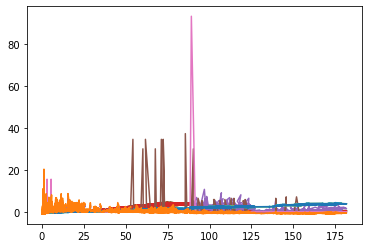

In [87]:
plt.plot(y, X)

(17623.0, 18322.1)

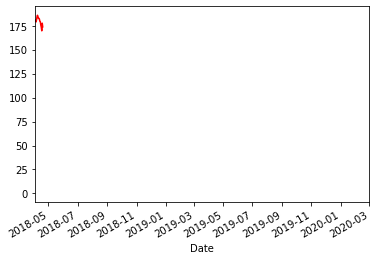

In [88]:
dates = pd.date_range (start="2018-03-21", end="2018-04-19" )
plt.plot(dates, forecast_predicted, color='r')
df['Adj. Close'].plot(color='y')
plt.xlim(xmin=datetime.date(2018,4,2))